# Tutorial for srfpython

**Overview**
 + Intro : import and verify installation
 + I/ create a 1-D depth model  
 + II/ compute dispersion curves   
     + II.1/ use in a python program  
     + II.2/ use in command line   
 - III/ depth inversion  
 - III.1/ Program HerrMet  
 - III.2/ Application  
     + III.2.1/ Target data  
     + III.2.2/ Parameterization  
     + III.2.3/ Run inversion  
     + III.2.4/ Extract results

## Intro/ import and verify installation

In [1]:
# -----------------------
# import all components of srfpython
# -----------------------
from srfpython import *

In [2]:
# -----------------------
# make sure that the fortran codes have been compiled correctly
# -----------------------
try:
    check_herrmann_codes() 
    print "ok"
    
except Exception:
    print "compilation was not done or done on another system"

    # recompile
    from srfpython import recompile_src90
    recompile_src90(yes=False)

    # verify once more
    try:
        check_herrmann_codes()
        print 'sucess'
    except Exception:
        print 'Error : unexpected failure, make sure you have gfortran installed'



ok


## I/ create a 1-D depth model

In [3]:
# -----------------------
# create 1-D depth model using 4 arrays with same length
# -----------------------
ztop = [0.00, 0.25, 0.45, 0.65, 0.85, 1.05, 1.53, 1.80] #km, top layer depth, positive, increasing downward, 0 = surface
vp   = [1.85, 2.36, 2.63, 3.15, 3.71, 4.54, 5.48, 5.80] #km/s, P wave velocity in each layer
vs   = [0.86, 1.10, 1.24, 1.47, 1.73, 2.13, 3.13, 3.31] #km/s, S wave velocity in each layer
rh   = [2.47, 2.47, 2.47, 2.47, 2.47, 2.58, 2.58, 2.63] #g/cm3, Density in each layer

# create the depthmodel object, use a subclass that is to be intitiated with arrays
# see also depthmodel, depthmodel1D, depthmodel_from_mod96, ...
dm = depthmodel_from_arrays(ztop, vp, vs, rh)


# __str__ returns the file content at mod96 format, (see Herrmann CPS documentation)
print dm 

MODEL.01
ISOTROPIC
KGS
FLAT EARTH
1-D
CONSTANT VELOCITY
LINE08
LINE09
LINE10
LINE11
H(KM) VP(KM/S) VS(KM/S) RHO(GM/CC) QP QS ETAP ETAS FREFP FREFS
0.250000 1.850000 0.860000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 2.360000 1.100000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 2.630000 1.240000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 3.150000 1.470000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.200000 3.710000 1.730000 2.470000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.480000 4.540000 2.130000 2.580000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.270000 5.480000 3.130000 2.580000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000
0.000000 5.800000 3.310000 2.630000 0.000000 0.000000 0.000000 0.000000 1.000000 1.000000



In [4]:
# -----------------------
# write the depth model as a file at mod96 format (see Herrmann CPS documentation)
# -----------------------
dm.write96('dmtuto.mod96')

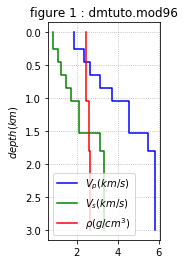

In [5]:
# -----------------------
# display the depth model
# -----------------------
plt.figure(figsize=(2, 4))
dm.show(gca())
gca().set_title('figure 1 : dmtuto.mod96')
gca().grid(True, linestyle=":")
plt.legend();

## II/ compute dispersion curves 

### II.1/ use in a python program

In [6]:
# -----------------------
# use one of the following functions from srfpython.Herrmann.Herrmann
# -----------------------
print help(dispersion)
# print help(dispersion_1)
# print help(dispersion_2)

Help on function dispersion in module srfpython.Herrmann.Herrmann:

dispersion(ztop, vp, vs, rh, waves, types, modes, freqs, h=0.005, dcl=0.005, dcr=0.005)
    compute surface wave dispersion curves from a 1-D depth model
    based on a modified version of the codes from Herrmann and Ammon 2002
    
    *) a dispersion curve is given by 4 attributes
        wave : string, "R" for Rayleigh, "L" for Love
        type : string, "C" for Phase velocity, "U" for Group-velocity
        mode : integer, a mode number, 0 means fundamental
        freq : array, frequencies in Hz
    
    *) a 1-D depth model is given by 4 attributes
        ztop : list or array, sorted, positive, top layer depth in km, ztop[0] must be 0 !!!
        vp   : list or array, P wave velocity in km/s
        vs   : list or array, S wave velocity in km/s
        rh   : list or array, density in g.cm^-3
    
    input:
        -> depth model
        ztop, vp, vs, rh = depth model, 4 iterables with same length
    
       

elapsed time dispersion : 0.054461s


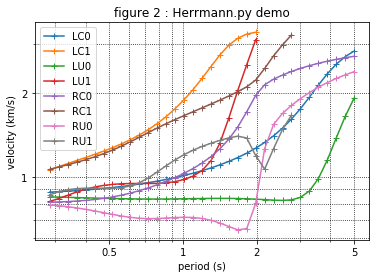

In [7]:
# -----------------------
# compute dispersion curves from the depthmodel above
# -----------------------

# define the dipsersion curves to compute
#          Wave(R/L) Type(C/U) Mode    Frequency array (Hz)             
Curves = [('R',      'U',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('R',      'U',      1,      freqspace(0.2, 3.5, 35, "log")), 
          ('R',      'C',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('R',      'C',      1,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'U',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'U',      1,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'C',      0,      freqspace(0.2, 3.5, 35, "log")), 
          ('L',      'C',      1,      freqspace(0.2, 3.5, 35, "log"))] 

# compute dispersion curves
with Timer('dispersion'):
    out = list(dispersion_2(ztop, vp, vs, rh, Curves)) # list is used to iterate over the generator

# display the results
ax = plt.gca()
for w, t, m, fs, us in out:
    ax.loglog(1. / fs, us, '+-', label = "%s%s%d" % (w, t, m))
ax.set_xlabel('period (s)')
ax.set_ylabel('velocity (km/s)')    
ax.grid(True, which = "major")
ax.grid(True, which = "minor")
logtick(ax, "xy")
ax.set_title('figure 2 : Herrmann.py demo')

plt.legend()
plt.show()

### II.2/ use in command line 

In [8]:
# -----------------------
# compute dispersion curves, and save as surf96 file
# -----------------------

import os
os.system('rm -f dmtuto*.surf96')
%run -i ../srfpython/bin/m96 --disp dmtuto.mod96 \
    -LC0 .1 10 30 plog \
    -RC1 .1 10 30 plog \
    -RU0 .1 10 30 plog \
    -save dmtuto.surf96

# if the srfpython/bin directory was added to the path as stated in README.md, simply use m96, s96, HerrMet, ...

dmtuto.mod96 => dmtuto.surf96


dmtuto.surf96
    Claw wave=L mode=0 type=C flag=T extrapmode=0 N=30
    Claw wave=R mode=1 type=C flag=T extrapmode=1 N=19
    Ulaw wave=R mode=0 type=U flag=T extrapmode=0 N=30


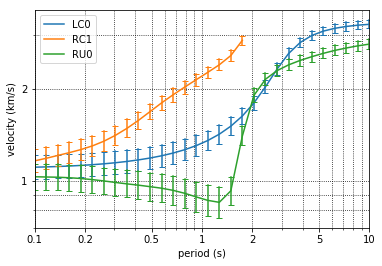

In [9]:
# -----------------------
# display output
# -----------------------

%run -i ../srfpython/bin/s96 --show dmtuto.surf96 -inline

see also programs **s96** and **m96** that provide more manipulation tools  
for depth models and surface wave dispersion curves in command line

In [10]:
%run -i ../srfpython/bin/m96 --help

m96
--show            list of mod96 files to display (same plot)
--disp            name of mod96 file to use as input
    -RU0          rayleigh, group, mode 0 : expects 4 frequency arguments : fstart, fend, nfreq, fscale
    -RU1          rayleigh, group, mode 1 : expects 4 frequency arguments : fstart, fend, nfreq, fscale
    -RC0          rayleigh, phase, mode 0 : expects 4 frequency arguments : fstart, fend, nfreq, fscale          
    -LC0          love,     phase, mode 0 : expects 4 frequency arguments : fstart, fend, nfreq, fscale
    ...
    -save         name of surf96file to write
--split 
    -thck         thickness of the sublayers in km
    -sfx          suffix to add before file extension (default split)
    -o            ignore suffix and overwrite input file
--addlayer 
    -thck         thickness of the sublayers in km
    -sfx          suffix to add before file extension (default split)
    -o            ignore suffix and overwrite input file    
-inline           rep

In [11]:
%run -i ../srfpython/bin/s96 --help

s96
--show            list of surf96files to display
    -freq         plot in frequency domain if specified
--resamp          list of surf96files to resample
    -fspace       new frequency array in Hz, fstart, fend, nfreq, fscale
    -sfx          file suffix to append, use "" to overwrite input files
-inline             replace showme by plt.show (e.g. for jupyter)
#surf96 format 
SURF96 {wave} {type} {flag} {mode} {period(s)} {value(km/s)} {dvalue(km/s)}



## III/ depth inversion

### III.1/ Program HerrMet

In [12]:
%run -i ../srfpython/bin/HerrMet --help

HerrMet V5.0
# ----------------------------------------------------
-w           i       set the number of virtual workers to use for all parallelized processes, default 4
-taskset     s       change job affinity for all parallelized processes, default 0-3
-agg                 use agg backend (no display) if mentioned
-lowprio             run processes with low priority if mentioned
-inline              replace showme by plt.show (e.g. jupyter)
-verbose off         reduce verbosity
-cmap                colormap, default gray
# ----------------------------------------------------
--version, -v        display version and quit
--help, -h           display this help message, and quit
--example, -ex       display an example of script, and quit
--param      i f     generate a template parameter file to custom, need the number of layers 
                     and bottom depth in km
    -basedon s       build parametrization based on an existing mod96 file, require a filename, 
                

In [13]:
%run -i ../srfpython/bin/HerrMet -ex


# -------------
# Example usage of HerrMet V5.0
# -------------

# 1/ Data
# get the target dispersion curves, resample it between 0.2-1.5 Hz 
# with 15 samples spaced logarithmically in period domain
# adjust uncertainties to 0.1 in logaritmic domain, 
# overwrite target if exists (_HerrMet.target) 
# and display it
HerrMet --target /path/to/my/data/file.surf96 \
            -resamp 0.2 1.5 15 plog \
            -lunc 0.1 \
            -ot \
            --display

# >> you may edit _HerrMet.target and remove points that 
#    do not need to be inverted, check with  
HerrMet --display

# 2/ Parameterization
# build parameter file from existing depthmodel,
# use 7 layers, use parametrization mZVSPRRH, 
# require vp, vs and density to be growing
# overwrite paramfile if exists (_HerrMet.param) and display
HerrMet --param 7 3. \
            -basedon /path/to/my/depthmodel.mod96 \
            -t  mZVSPRRH \
            -growing \
            -op \
            --display

# >> now edit _Her

### III.2/ Application

we propose to invert the synthetic data generated in section I (dmtuto.surf96) and compare the inversion result to the actual model used to synthetize the data (i.e. dmtuto.mod96)

In [14]:
# -----------------------
# assert section I was executed
# clear former temporary files from III
# -----------------------

import os, glob
assert os.path.exists("./dmtuto.surf96")

# clean up before running
%run -i ../srfpython/bin/HerrMet --clean

# list files in this directory
for _ in glob.iglob('./*'):
    print _, 

./dmtuto.mod96 ./dmtuto.surf96 ./tutorial.ipynb


#### III.2.1/ Target data

please keep only datapoints to invert in _HerrMet.target
use option --display to see the target data
_HerrMet.target
    Claw wave=L mode=0 type=C flag=T extrapmode=0 N=7
    Claw wave=R mode=1 type=C flag=T extrapmode=1 N=3
    Ulaw wave=R mode=0 type=U flag=T extrapmode=0 N=7


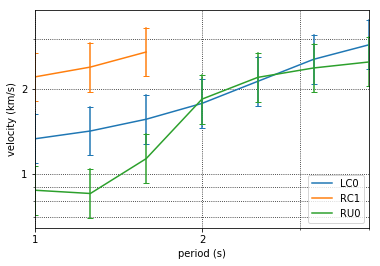

In [15]:
# -----------------------
# set the dispersion curves to invert referred to as the target data
# the dispersion curve must be provided as surf96 format (see Herrmann's doc, CPS)
# I reproduce the file content into _Herrmann.target (also at surf96 format), 
# which can be modified manually before inversion 
# (e.g. resample, remove data points or modes, adjust uncertainties for weighting, ...)
# -----------------------

# the following command will (see HerrMet --help for command names): 
# - get the target dispersion curves from dmtuto.surf96 (--target), 
# - resample it between 0.25-1 Hz with 7 samples spaced logarithmically in period domain (-resamp),
# - adjust the uncertainties to 0.2 * velocity (i.e. constant uncertainty in logaritmic domain, --lunc), 
# - overwrite the target file if exists (-ot) 

%run -i ../srfpython/bin/HerrMet \
    --target dmtuto.surf96 \
        -resamp 0.25 1.0 7 plog \
        -lunc 0.2 \
        -ot
            
# display the target file with s96 (-inline avoids the program to pause)
%run -i ../srfpython/bin/s96 --show _HerrMet.target -inline

# or directly with HerrMet (--display)
# %run -i ../bin/HerrMet --display -inline

#### III.2.2/ Parameterization

#met DRHMIN = 0.0
#met DPRMAX = 0.0
#met DVPMIN = 0.0
#met DRHMAX = 5.0
#met DVPMAX = 5.0
#met DVSMAX = 5.0
#met DPRMIN = -5.0
#met PRIORTYPE = 'DVPDVSDRHDPR'
#met NLAYER = 4
#met TYPE = 'mZVSPRRH'
#met DVSMIN = 0.0
#fld KEY VINF VSUP
#unt - - -
#fmt %5s %16f %16f
       -Z1        -0.217990        -0.217990
       -Z2        -0.895334        -0.895334
       -Z3        -3.000000        -3.000000
       VS0         1.111553         1.111553
       VS1         1.577859         1.577859
       VS2         3.071242         3.071242
       VS3         3.310000         3.310000
       PR0         2.143200         2.143200
       PR1         2.136603         2.136603
       PR2         1.800138         1.800138
       PR3         1.752266         1.752266
       RH0         2.470000         2.470000
       RH1         2.485482         2.485482
       RH2         2.614447         2.614447
       RH3         2.630000         2.630000

please customize _HerrMet.param, do not change line orders 

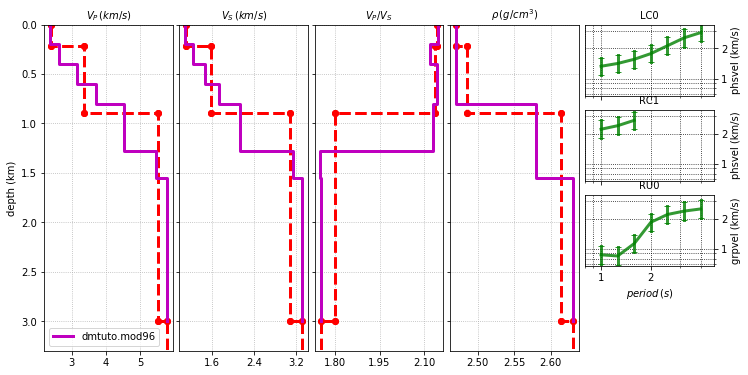

In [16]:
# -----------------------
# set the parameter file, the parameters will be stored into _Herrmet.param
# use Herrmet to generate a template version
# and customize it manually before running the inversion
# -----------------------

# the following command will :
# - set the parameter file with 4 layers down to 3 km (--param)
# - the parameters values will be adjusted based on an existing depthmodel (here dmtuto.mod96, -basedon),
# - define the parameterization mode as depth, vs, vp/vs and density (-t mZVSPRRH)
#   some other modes are available
# - require vp, vs and density to be growing (i.e. add prior constraints to the offsets between layers, -growing),             
# - overwrite the paramfile if exists (-op) 
# - display (-display) without pausing (-inline), plot also the actual model (-m96)

%run -i ../srfpython/bin/HerrMet \
        --param 4 3. \
            -basedon dmtuto.mod96 \
            -t  mZVSPRRH \
            -growing \
            -op \
        --display \
            -m96 dmtuto.mod96 \
            -inline

> red dashed curves = prior boundaries (locked for now)   
> green duspersion curves = target data  
> purple model = actual model used to generate the synthetic data and to build the parameterization    

> * Note that at this step, the boundaries for each parameter (red dashed curves)   
> are the same (because VINF=VSUP in _HerrMet.param) : i.e. all parameters are locked  
> one need to adjust the VINF, VSUP boundaries for all parameters to invert  
> you may do it manually (edit _HerrMet.param),   
> here I do it with programming tools for tutorial  


> * Note also that VP is not a parameter in this example, (since we use VS and VP/VS)  
> so the boundaries displayed on the VP axis are inferred from the VS and VP/VS ones
>


In [17]:
# -----------------------
# customize the parameterization file using programming tools (for tutorial)
# You may do it manually simply by editing _Herrmet.param
# -----------------------

#load the parameter file, find lines related to top depth and to VS
from tetedenoeud import AsciiFile
A = AsciiFile('_HerrMet.param')

IZ  = np.asarray(["Z"  in _ for _ in A['KEY']], bool) #lines corresponding to Z parameters
IVS = np.asarray(["VS" in _ for _ in A['KEY']], bool) #lines corresponding to VS parameters
IPR2 = np.asarray(["PR2" in _ for _ in A['KEY']], bool) #line corresponding to VP/VS in the third layer

In [18]:
# change parameter boundaries (decrease VINF and increase VSUP), overwrite _HerrMet.param
A['VINF'][IVS] = [0.55, 0.78, 1.53, 1.65]
A['VSUP'][IVS] = [2.22, 3.15, 4.00, 4.00]
A['VINF'][IZ]  = [-.31, -1.5, -3.1]
A['VSUP'][IZ]  = [-.11, -1.1, -2.0]
A['VINF'][IPR2] = A['VSUP'][IPR2] = 1.752
print A

# overwrite the parameterization file
A.write('_HerrMet.param')

#met DRHMIN = 0.0
#met DPRMAX = 0.0
#met DVPMIN = 0.0
#met DRHMAX = 5.0
#met DVPMAX = 5.0
#met DVSMAX = 5.0
#met DPRMIN = -5.0
#met PRIORTYPE = 'DVPDVSDRHDPR'
#met NLAYER = 4
#met TYPE = 'mZVSPRRH'
#met DVSMIN = 0.0
#fld KEY VINF VSUP
#unt - - -
#fmt %5s %16f %16f
       -Z1        -0.310000        -0.110000
       -Z2        -1.500000        -1.100000
       -Z3        -3.100000        -2.000000
       VS0         0.550000         2.220000
       VS1         0.780000         3.150000
       VS2         1.530000         4.000000
       VS3         1.650000         4.000000
       PR0         2.143200         2.143200
       PR1         2.136603         2.136603
       PR2         1.752000         1.752000
       PR3         1.752266         1.752266
       RH0         2.470000         2.470000
       RH1         2.485482         2.485482
       RH2         2.614447         2.614447
       RH3         2.630000         2.630000



parameter type :  Parameterizer_mZVSPRRH
prior type     :  LogRhoM_DVPDVSDRHDPR


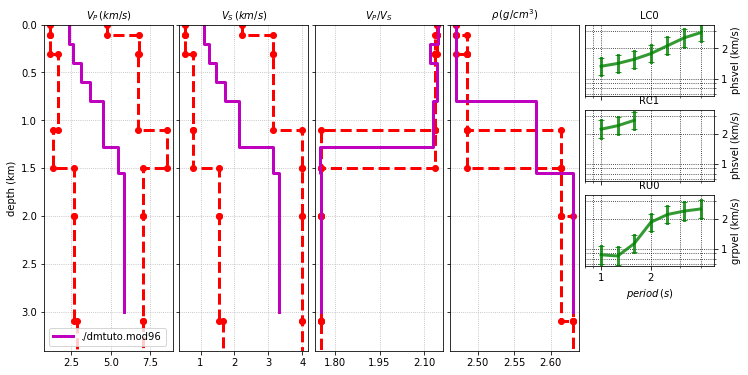

In [19]:
# -----------------------
# display the new version of the parameterization file
# -----------------------

#note that the boundaries now allow VS and Zop to vary between the red dashed lines
%run -i ../srfpython/bin/HerrMet --display -inline -m96 ./dmtuto.mod96

#### III.2.3/ Run inversion

In [20]:
# -----------------------
# run the inversion, will load the parameterization and target data,
# and generate markov chains to sample the posterior pdf (in parallel)
# the models generated by the chains will be stored in a sqlite database (_HerrMet.run)
# -----------------------

# the following command will :
# - run the inversion with 12 markov chains in restart mode (overwrites _HerrMet.run if exists)
# - each chain will be asked to keep 100 models
# - use 4 virtual threads (-w) affected to the first 4 physical threads (-taskset)
%run -i ../srfpython/bin/HerrMet \
    -w 4 -taskset "0-3" \
    --run restart \
        -nchain 12 \
        -nkeep 100 \
        -verbose off
        
# notations :
# kept : the number of models kept by the markov chain over the number of tests
# fail : some models can lead to failure of the forward algo (CPS), 
#        we consider them as models with no image in the dataspace
#        the penalty is adjusted to force the chains to move away from these dead ends
# AK   : Average keep ratio : the number of models kept / the number of tests
#        by default, the proposal pdf is adjusted to maintain this value around .25
# MP   : Master proposal : a coefficient to adjust the proposal distance according to AK
# AS   : Average speed : the average number of models tested per second and per chain
# LI   : Final log likelyhood = the quality of the last model found (not necessarily the best)

parameter type :  Parameterizer_mZVSPRRH
prior type     :  LogRhoM_DVPDVSDRHDPR
chain    0  DONE kept  100/  522 fail   43 AK 0.19 MP 0.35 AS  25.79/s LI -1.885126
chain    2  DONE kept  100/  499 fail    6 AK 0.20 MP 0.44 AS  24.49/s LI -6.756619
chain    3  DONE kept  100/  510 fail    6 AK 0.19 MP 0.39 AS  24.49/s LI -5.750668
chain    1  DONE kept  100/  561 fail    6 AK 0.18 MP 0.27 AS  24.70/s LI -5.115669
chain    6  DONE kept  100/  199 fail   17 AK 0.47 MP 2.85 AS  28.33/s LI -35.360085
chain    4  DONE kept  100/  487 fail    6 AK 0.20 MP 0.49 AS  25.22/s LI -1.054375
chain    5  DONE kept  100/  522 fail   13 AK 0.19 MP 0.34 AS  25.61/s LI -4.574348
chain    7  DONE kept  100/  500 fail    8 AK 0.20 MP 0.43 AS  25.35/s LI -1.966326
chain    8  DONE kept  100/  508 fail   20 AK 0.20 MP 0.43 AS  25.89/s LI -2.848085
chain   10  DONE kept  100/  199 fail   19 AK 0.47 MP 2.85 AS  28.96/s LI -3.485970
chain    9  DONE kept  100/  516 fail   23 AK 0.19 MP 0.36 AS  30.58/s LI -3.10

top : llkmin 0.000000, limit 200, step 1 retrieved 200 models in 0.182811s 
pdf : llkmin 0.000000, limit 0, step 1 retrieved 1212 models in 0.474645s 
Stacker Worker-0001 stacked    299 jobs in 0.465626s
Stacker Worker-0002 stacked    299 jobs in 0.450702s
Stacker Worker-0004 stacked    299 jobs in 0.395231s
Stacker Worker-0003 stacked    315 jobs in 0.416251s
parameter type :  Parameterizer_mZVSPRRH
prior type     :  LogRhoM_DVPDVSDRHDPR


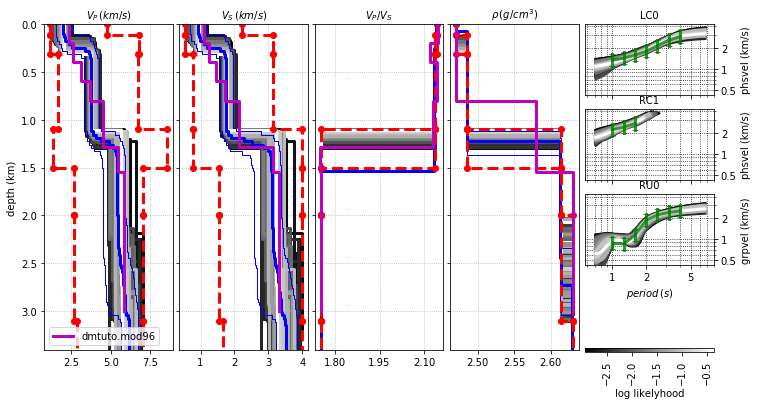

In [21]:
# -----------------------
# display the results, by selecting models in the sqlite database (_HerrMet.run)
# -----------------------

# the following command will :
# - display the best 200 models found and their image in the dataspace (-top)
# - recompute the dispersion curves with higher resolution (-overdisp)
# - compute the median and std of the full population of models (-pdf)
# - add the model used to synthetize the data (dmtuto.mod96) for comparison (-m96)
%run -i ../srfpython/bin/HerrMet \
        --display \
            -top 0 200 1 \
            -overdisp \
            -pdf \
            -verbose off \
            -inline \
            -m96 dmtuto.mod96


> red dashed curves = prior boundaries  
> green duspersion curves = target data  

> gray models = 200 best models sorted by increaseing likelyhood (see colorbar)   
> gray dispersion curves = corresponding data, recomputed with higher resolution  

> blue lines = median (thick), 16% 84% percentiles (thin) computed from the full population of models = solution  
> purple model = actual model used to generate the synthetic data = expected solution  


#### III.2.4/ Extract results

In [22]:
# -----------------------
# HerrMet can create figures, 
# however you probably need to get the results at numerical format for further analysis
# use option --extract
# -----------------------

# the following command will:
# -compute the median and std of the best 1000 models found, 
# -save it as mod96 files named 
#     _HerrMet.p0.16.mod96,_HerrMet.p0.50.mod96 and _HerrMet.p0.84.mod96
%run -i ../srfpython/bin/HerrMet --extract 0.0 1000 1 

connecting to        : /Users/max/macprog/git/srfpython/tutorial/_HerrMet.run
extract : llkmin 0.000000, limit 1000, step 1 retrieved 1000 models in 0.634447s 
closing              : /Users/max/macprog/git/srfpython/tutorial/_HerrMet.run
Stacker Worker-0001 stacked    259 jobs in 0.408919s
Stacker Worker-0002 stacked    292 jobs in 0.372546s
Stacker Worker-0004 stacked    221 jobs in 0.395697s
Stacker Worker-0003 stacked    228 jobs in 0.359577s


_HerrMet.p0.50.mod96
_HerrMet.p0.16.mod96
_HerrMet.p0.84.mod96
dmtuto.mod96


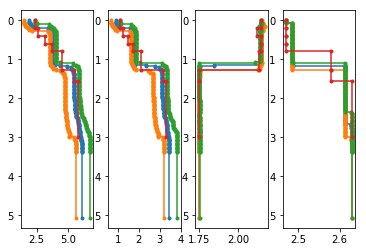

In [23]:
#display models from --extract using m96
%run -i ../srfpython/bin/m96 --show _HerrMet.p*.mod96 dmtuto.mod96 -inline

In [24]:
# clear temporary files
%run -i ../srfpython/bin/HerrMet --clean
os.system('trash dmtuto.*96')
for _ in glob.iglob('./*'):
    print _,

./tutorial.ipynb
